# 1. Variation of PFI across different area bins

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

# Load CSV
data = pd.read_csv('/home/jovyan/pfi_run_output/pluvial_final_run_alpha_corrected.csv')

# Define custom area bins for standardization
standardization_bins = [(0, 5), (5, 10), (10, 15), (15, data['area_sqkm'].max() * 1.1)]

# Standardize PFI-1 and PFI-2 within each area bin
standardized_pfi1 = []
standardized_pfi2 = []

for low, high in standardization_bins:
    bin_mask = (data['area_sqkm'] >= low) & (data['area_sqkm'] < high)
    bin_data = data.loc[bin_mask, ['PFI_1', 'PFI_2']]
    
    # Z-score standardization
    pfi1_z = (bin_data['PFI_1'] - bin_data['PFI_1'].mean()) / bin_data['PFI_1'].std()
    pfi2_z = (bin_data['PFI_2'] - bin_data['PFI_2'].mean()) / bin_data['PFI_2'].std()
    
    standardized_pfi1.append(pfi1_z)
    standardized_pfi2.append(pfi2_z)

# Combine all standardized values
data['PFI_1_std'] = pd.concat(standardized_pfi1).sort_index()
data['PFI_2_std'] = pd.concat(standardized_pfi2).sort_index()

# Normalize final standardized values to range [0, 1] using min-max scaling
def normalize(series):
    return (series - series.min()) / (series.max() - series.min())

data['PFI_1_norm'] = normalize(data['PFI_1_std'])
data['PFI_2_norm'] = normalize(data['PFI_2_std'])

# Define area ranges for plotting
plot_ranges = [(0, 5), (5, 10), (10, 15), (15, data['area_sqkm'].max() * 1.1)]
labels = ['0-5', '5-10', '10-15', '>15']
colors = ['#FFA07A', '#20B2AA', '#9370DB', '#FFD700']

# Prepare data for boxplots
pfi1_data = []
pfi2_data = []
for low, high in plot_ranges:
    pfi1_data.append(data[(data['area_sqkm'] >= low) & (data['area_sqkm'] <= high)]['PFI_1_norm'].dropna())
    pfi2_data.append(data[(data['area_sqkm'] >= low) & (data['area_sqkm'] <= high)]['PFI_2_norm'].dropna())

# Create plot
fig, ax = plt.subplots(figsize=(8, 6))

# Background bands
for i in range(len(plot_ranges)):
    left = i - 0.5
    right = i + 0.5
    ax.axvspan(left, right, ymin=0, ymax=1, color=colors[i], alpha=0.3, zorder=0)

# Box plot positions
box_width = 0.14
spacing = 0.2
positions_pfi1 = [i - spacing / 2 for i in range(len(plot_ranges))]
positions_pfi2 = [i + spacing / 2 for i in range(len(plot_ranges))]

# Boxplots
ax.boxplot(pfi1_data, positions=positions_pfi1, widths=box_width, patch_artist=True,
           boxprops=dict(facecolor='blue', color='black', alpha=0.8),
           medianprops=dict(color='black', linewidth=2),
           whiskerprops=dict(color='black', linewidth=2),
           capprops=dict(color='black', linewidth=2),
           flierprops=dict(marker='o', color='black', alpha=0.5))

ax.boxplot(pfi2_data, positions=positions_pfi2, widths=box_width, patch_artist=True,
           boxprops=dict(facecolor='coral', color='black', alpha=0.8),
           medianprops=dict(color='black', linewidth=2),
           whiskerprops=dict(color='black', linewidth=2),
           capprops=dict(color='black', linewidth=2),
           flierprops=dict(marker='o', color='black', alpha=0.5))

# Axis formatting
ax.set_xticks(range(len(labels)))
ax.set_xticklabels(labels, fontsize=14)
ax.set_xlabel('Area (sq.km)', fontsize=14)
ax.set_ylabel('PFI', fontsize=14)
ax.tick_params(axis='y', labelsize=14)

# Legend
legend_elements = [
    plt.Rectangle((0, 0), 1, 1, facecolor='blue', alpha=0.8, label='PFI-1'),
    plt.Rectangle((0, 0), 1, 1, facecolor='coral', alpha=0.8, label='PFI-2')
]
ax.legend(handles=legend_elements, fontsize = 12, loc='upper left', frameon=False)

# Border and limits
for spine in ax.spines.values():
    spine.set_linewidth(2)

ax.set_xlim(-0.5, len(labels) - 0.5)

# Save and show
plt.tight_layout()
#plt.savefig('/home/jovyan/pfi_run_output/standardized_normalized_pfi.png', dpi=300)
plt.show()


# 2. Variation of damage across different area bins

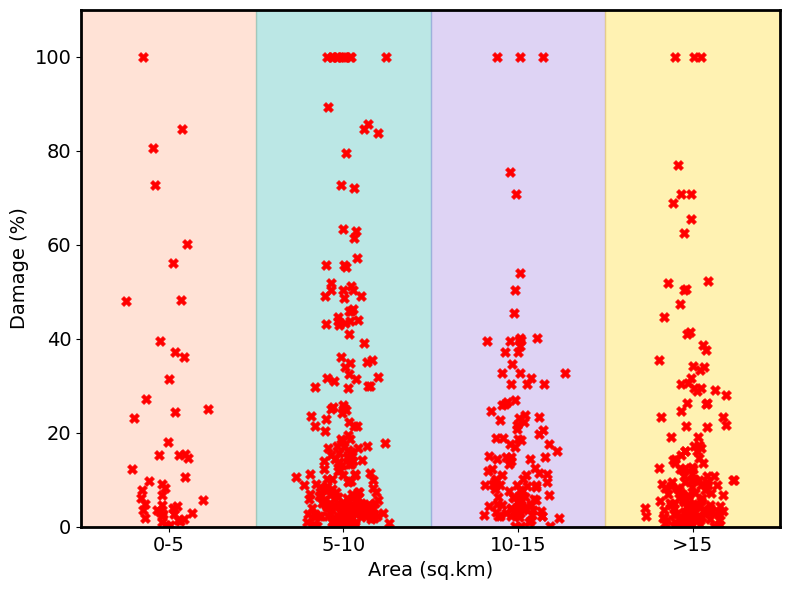

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from matplotlib.colors import LinearSegmentedColormap

# Read the CSV file
data = pd.read_csv('/home/jovyan/pfi_run_output/pluvial_final_run_alpha_corrected_timeinclude.csv')

# Define area ranges and colors
bounds = [0, 5, 10, 15]
colors = ['#FFA07A', '#20B2AA', '#9370DB', '#FFD700']  # Light pink, gray, light yellow, light blue
ranges = [(0, 5), (5, 10), (10, 15), (15, data['area_sqkm'].max() * 1.1)]
labels = ['0-5', '5-10', '10-15', '>15']

# Create the scatter plot
fig, ax = plt.subplots(figsize=(8,6))

# Add color-coded background bands
band_width = 1  # Width of each band
for i in range(len(ranges)):
    left = i - band_width/2
    right = i + band_width/2
    ax.axvspan(left, right, ymin=0, ymax=1, color=colors[i], alpha=0.3, zorder=0)

# Create scatter plots for each area range
for i, (low, high) in enumerate(ranges):
    # Filter data for current range
    range_data = data[(data['area_sqkm'] >= low) & (data['area_sqkm'] <= high)]
    
    # Remove NaN values from damage column
    range_data_clean = range_data.dropna(subset=['damage'])
    
    if len(range_data_clean) > 0:
        # Create x-coordinates with some jitter to avoid overlapping points
        x_coords = np.random.normal(i, 0.1, len(range_data_clean))
        
        # Plot scatter points
        ax.scatter(x_coords, range_data_clean['damage'], 
                  alpha=1, s=50, color='red', marker='X', linewidth=0.5)

# Set labels and ticks
ax.set_xticks(range(len(ranges)))
ax.set_xticklabels(labels, fontsize=14)
ax.set_xlabel('Area (sq.km)', fontsize=14)
ax.set_ylabel('Damage (%)', fontsize=14)
ax.tick_params(axis='y', labelsize=14)

# Set plot borders
for spine in ax.spines.values():
    spine.set_linewidth(2)

# Set x-axis limits to show the bands properly
ax.set_xlim(-0.5, len(ranges) - 0.5)

# Set y-axis limits (assuming damage is a percentage from 0-100)
ax.set_ylim(0, max(100, data['damage'].max() * 1.1))

# Adjust layout and show
plt.tight_layout()
#plt.savefig('/home/jovyan/pfi_run_output/damage.png',dpi=300)
plt.show()

# 3. Variation of α values

Values > 0 before outlier removal: 2094
Values after outlier removal: 1874
Median (no outliers): 11.2210


<Figure size 800x600 with 0 Axes>

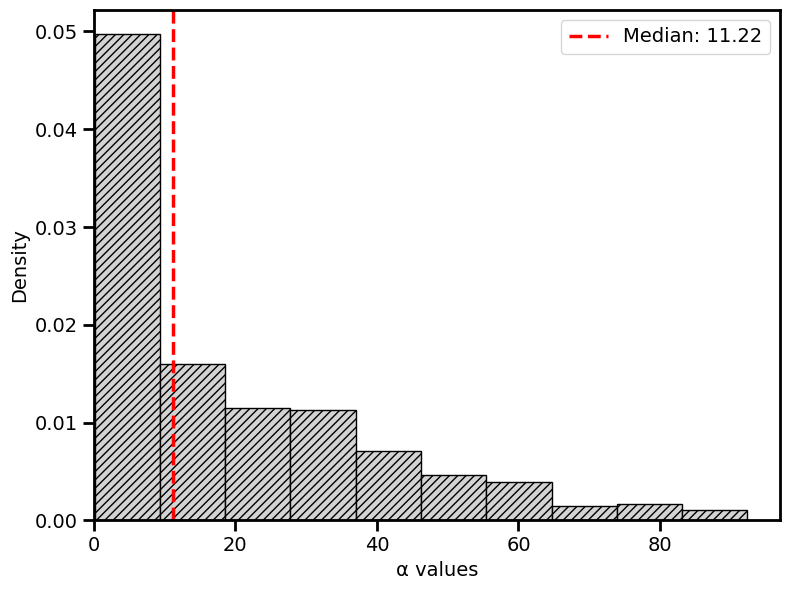

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import norm

# Load the CSV file
file_path = "/home/jovyan/pfi_run_output/pluvial_final_run_indices2.csv"
df = pd.read_csv(file_path)

# Define alpha columns
alpha_cols = ['alpha1', 'alpha2', 'alpha3', 'alpha4', 'alpha5']
threshold = 0  

# Combine all alpha values and drop NaNs
all_alpha = pd.concat([df[col] for col in alpha_cols], ignore_index=True).dropna()

# Step 1: Filter values > threshold
filtered_alpha = all_alpha[all_alpha > threshold]

# Step 2: Remove outliers using IQR method
Q1 = filtered_alpha.quantile(0.25)
Q3 = filtered_alpha.quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR
alpha_no_outliers = filtered_alpha[(filtered_alpha >= lower_bound) & (filtered_alpha <= upper_bound)]

# Step 3: Compute statistics
median_filtered = np.median(alpha_no_outliers)
mu, sigma = norm.fit(alpha_no_outliers)

# Output stats
print(f"Values > {threshold} before outlier removal: {len(filtered_alpha)}")
print(f"Values after outlier removal: {len(alpha_no_outliers)}")
print(f"Median (no outliers): {median_filtered:.4f}")

# Step 4: Plotting
plt.figure(figsize=(8, 6))
#sns.histplot(alpha_no_outliers, bins=10, stat='density', color='gray')
# Compute histogram manually
counts, bins = np.histogram(alpha_no_outliers, bins=10, density=True)
bin_width = bins[1] - bins[0]
bin_centers = bins[:-1]

# Plot manually with hatching
plt.figure(figsize=(8, 6))
bars = plt.bar(bin_centers, counts, width=bin_width, align='edge',
               color='lightgray', edgecolor='black', hatch='////')
# Normal distribution fit
#x = np.linspace(alpha_no_outliers.min(), alpha_no_outliers.max(), 100)
#plt.plot(x, norm.pdf(x, mu, sigma), 'b-', lw=2.5, label='Fit')

# Median and threshold lines
plt.axvline(median_filtered, color='red', lw=2.5, linestyle='--', label=f'Median: {median_filtered:.2f}')

plt.xlabel('α values', fontsize=14)
plt.ylabel('Density', fontsize=14)
ax = plt.gca()
# Thicker plot spines
ax.set_xlim(left=0)
ax.tick_params(axis='x', labelsize=14)
ax.tick_params(axis='y', labelsize=14)
for spine in ax.spines.values():
    spine.set_linewidth(2)
for line in ax.lines:
    line.set_markersize(12)
ax.tick_params(axis='both', which='both', width=2, length=8)
plt.legend(fontsize=14)
plt.tight_layout()
#plt.savefig("/home/jovyan/pfi_run_output/alpha.png", dpi=300)
plt.show()


# 4. Variation of simulation time 

Total values: 562
Mean: 16.21
Median: 19.00
Mode: 24.00
Fitted Normal Mean (mu): 16.21
Fitted Normal Std Dev (sigma): 7.80


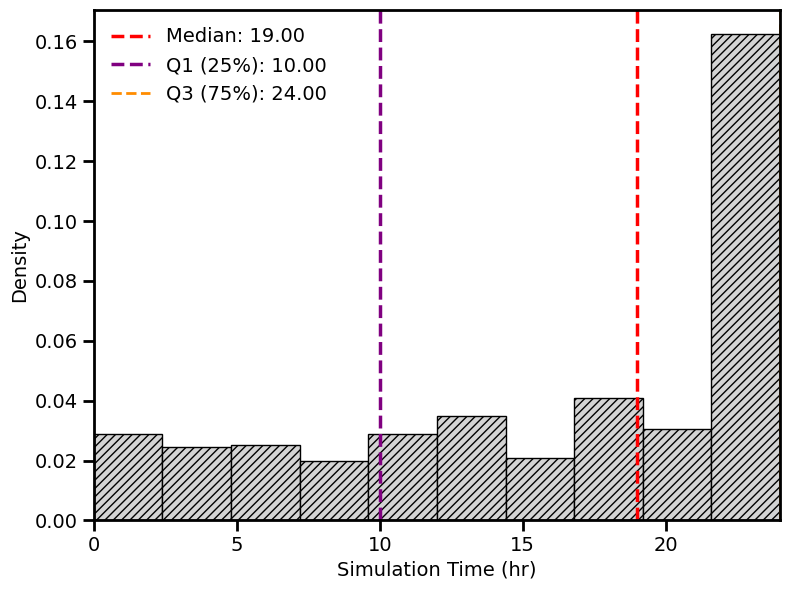

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats

# Load the CSV file
file_path = "/home/jovyan/pfi_run_output/pluvial_final_run_indices2.csv"
df = pd.read_csv(file_path)

# Extract forecast_time values and drop NaNs
forecast_time = df['forecast_time'].dropna()
#forecast_time = forecast_time[forecast_time > 0]  # Optional: skip zeros if needed

# Compute statistics
mean_val = forecast_time.mean()
median_val = forecast_time.median()
mode_val = stats.mode(forecast_time, keepdims=True)[0][0]
mu, sigma = stats.norm.fit(forecast_time)
q1_val = forecast_time.quantile(0.25)
q3_val = forecast_time.quantile(0.75)
print(f"Total values: {len(forecast_time)}")
print(f"Mean: {mean_val:.2f}")
print(f"Median: {median_val:.2f}")
print(f"Mode: {mode_val:.2f}")
print(f"Fitted Normal Mean (mu): {mu:.2f}")
print(f"Fitted Normal Std Dev (sigma): {sigma:.2f}")

# Create histogram manually
counts, bins = np.histogram(forecast_time, bins=10, density=True)
bin_width = bins[1] - bins[0]
bin_centers = bins[:-1]

plt.figure(figsize=(8, 6))
bars = plt.bar(bin_centers, counts, width=bin_width, align='edge',
               color='lightgray', edgecolor='black', hatch='////')

# Plot fitted normal distribution
#x = np.linspace(forecast_time.min(), forecast_time.max(), 100)
#plt.plot(x, stats.norm.pdf(x, mu, sigma), 'b-', lw=2.5, label='Normal fit')

# Add vertical lines for statistics
plt.axvline(median_val, color='red', linestyle='--', lw=2.5, label=f'Median: {median_val:.2f}')
plt.axvline(q1_val, color='purple', linestyle='--', lw=2.5, label=f'Q1 (25%): {q1_val:.2f}')
plt.axvline(q3_val, color='darkorange', linestyle='--', lw=2, label=f'Q3 (75%): {q3_val:.2f}')
#plt.axvline(mean_val, color='#ff7f0e', linestyle='--', lw=2, label=f'Mean: {mean_val:.2f}')
#plt.axvline(mode_val, color='green', linestyle=':', lw=2, label=f'Mode: {mode_val:.2f}')

# Axis labels and formatting
plt.xlabel('Simulation Time (hr)', fontsize=14)
plt.ylabel('Density', fontsize=14)
ax = plt.gca()
ax.set_xlim(left=0, right=24)
#ax.set_xticks(np.arange(0, 24 + step, step))
ax.tick_params(axis='both', which='both', width=2, length=8)
ax.tick_params(labelsize=14)
for spine in ax.spines.values():
    spine.set_linewidth(2)
plt.legend(fontsize=14, frameon=False)
plt.tight_layout()
#plt.savefig("/home/jovyan/pfi_run_output/simulation_time.png", dpi=300)
plt.show()


# 5. Runoff clusters based on the landcover and area

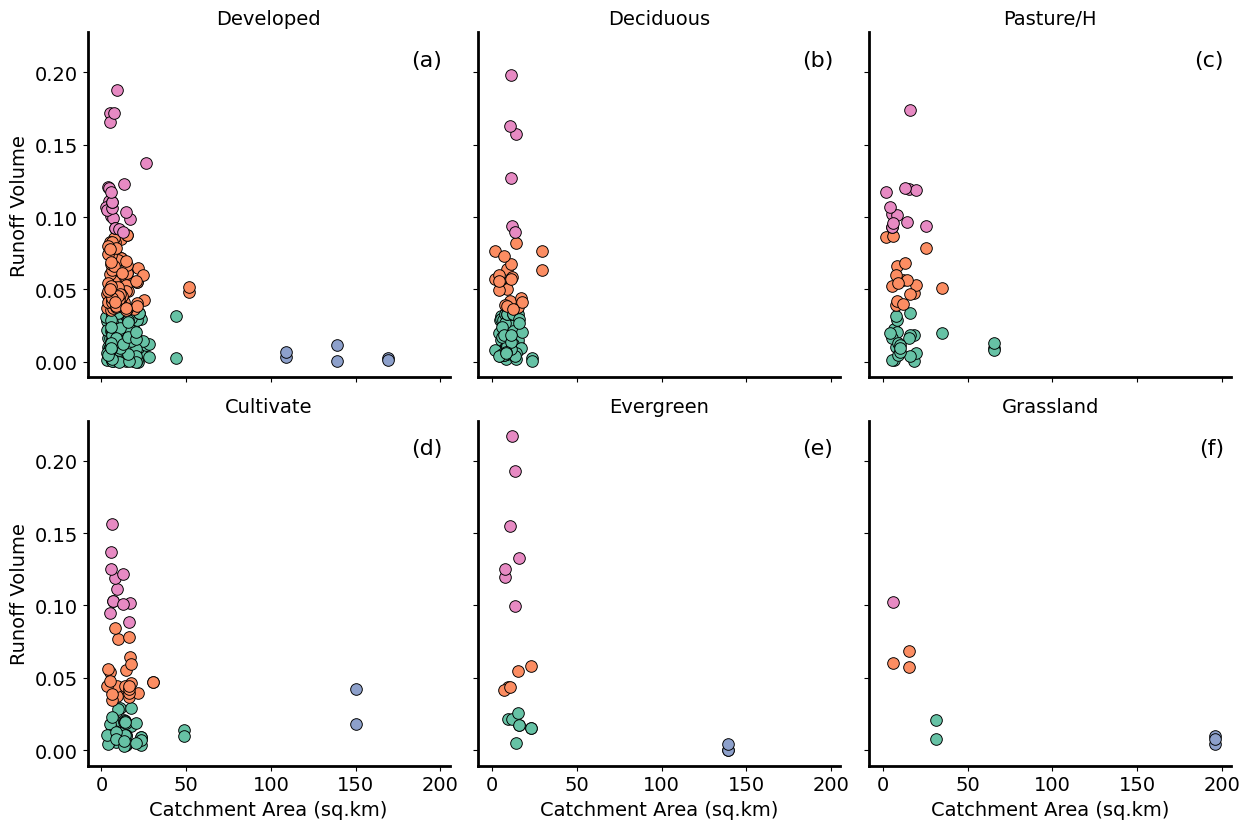

In [7]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

# Load data
data = pd.read_csv('/home/jovyan/pfi_run_output/PF_LULC.csv')

# Drop rows with missing values in relevant columns
data = data.dropna(subset=['ClassName', 'area_sqkm', 'runoff_volume'])

# Prepare features
features = data[['area_sqkm', 'runoff_volume']]
scaler = StandardScaler()
features_scaled = scaler.fit_transform(features)

# KMeans clustering
kmeans = KMeans(n_clusters=4, random_state=42, n_init=10)
data['cluster'] = kmeans.fit_predict(features_scaled)

# Select top 6 most common landcover classes to display (optional for clarity)
top_classes = data['ClassName'].value_counts().nlargest(6).index
plot_data = data[data['ClassName'].isin(top_classes)].copy()

# Create plot: area vs runoff, color = cluster, facet by landcover
g = sns.FacetGrid(
    plot_data,
    col='ClassName',
    hue='cluster',
    palette='Set2',
    col_wrap=3,
    height=4.2,
    aspect=1
)
g.map_dataframe(
    sns.scatterplot,
    x='area_sqkm',
    y='runoff_volume',
    edgecolor='black',
    s=70
)

# Axis and title formatting
for ax in g.axes.flat:
    ax.set_xlabel("Catchment Area (sq.km)", fontsize=14)
    ax.set_ylabel("Runoff Volume", fontsize=14)
g.set_titles(col_template="{col_name}", size=14)
# ---------- panel lettering on the right ----------
panel_labels = list("abcdefghijklmnopqrstuvwxyz")
for i, ax in enumerate(g.axes.flat):
    ax.text(
        0.98, 0.95,                     # near-right, near-top
        f"({panel_labels[i]})",
        transform=ax.transAxes,
        ha="right", va="top",
        fontsize=16,
    )
#g.add_legend(title="Cluster")
for ax in g.axes.flat:
    # Thicken all four spines
    for spine in ax.spines.values():
        spine.set_linewidth(2)  # adjust thickness as preferred

    # Enlarge tick labels
    ax.tick_params(axis='both', which='major', labelsize=14)
for ax in g.axes.flat:
    ax.grid(False)
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)

plt.tight_layout()
#plt.savefig('/home/jovyan/pfi_run_output/knn_clusters_by_landcover.png', dpi=300)
plt.show()


In [ ]:
# 3. Variation of α values across different area bins


Area Bin: 0-5
  PFI-1 Beta Parameters: a = 1.4866, b = 6.4501
  PFI-1 Proportion above threshold (0.2): 0.5102
  PFI-2 Beta Parameters: a = 1.6180, b = 7.2443
  PFI-2 Proportion above threshold (0.2): 0.5102

Area Bin: 5-10
  PFI-1 Beta Parameters: a = 3.6502, b = 15.0556
  PFI-1 Proportion above threshold (0.2): 0.4128
  PFI-2 Beta Parameters: a = 1.9159, b = 6.6576
  PFI-2 Proportion above threshold (0.2): 0.3807

Area Bin: 10-15
  PFI-1 Beta Parameters: a = 3.7802, b = 15.5071
  PFI-1 Proportion above threshold (0.2): 0.4000
  PFI-2 Beta Parameters: a = 4.4277, b = 18.9516
  PFI-2 Proportion above threshold (0.2): 0.4160

Area Bin: >15
  PFI-1 Beta Parameters: a = 1.5788, b = 4.9626
  PFI-1 Proportion above threshold (0.2): 0.3439
  PFI-2 Beta Parameters: a = 5.8116, b = 24.3312
  PFI-2 Proportion above threshold (0.2): 0.3885


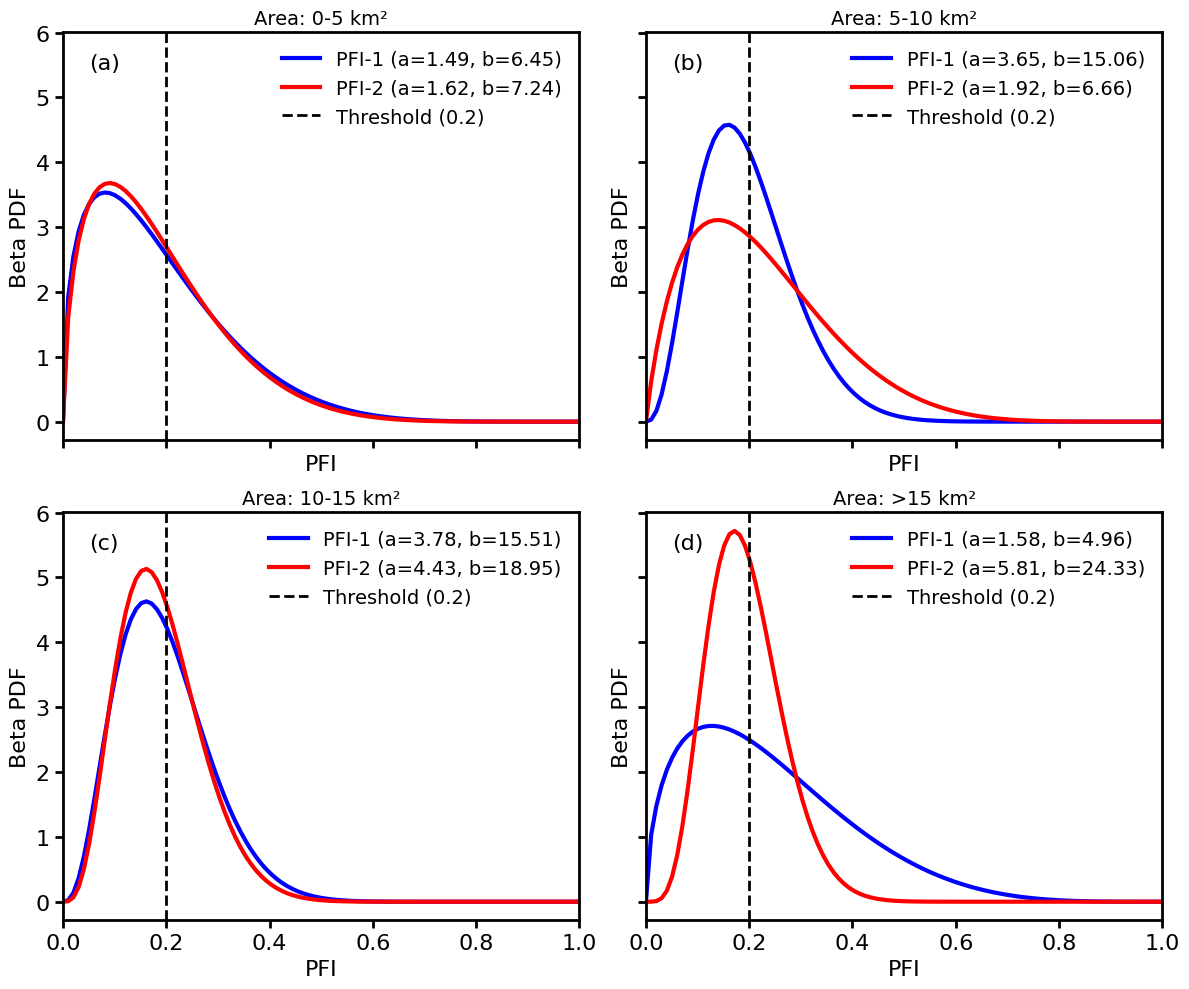

In [8]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from scipy.stats import beta

# Load CSV
data = pd.read_csv('/home/jovyan/pfi_run_output/pluvial_final_run_alpha_corrected.csv')

# Define area bins
bounds = [0, 5, 10, 15]
ranges = [(0, 5), (5, 10), (10, 15), (15, data['area_sqkm'].max() * 1.1)]
labels = ['0-5', '5-10', '10-15', '>15']
subplot_labels = ['(a)', '(b)', '(c)', '(d)']
# Standardize within each area bin and normalize across all data
def standardize_and_normalize(data, column, bins):
    standardized = data.copy()
    for low, high in bins:
        mask = (data['area_sqkm'] >= low) & (data['area_sqkm'] <= high)
        standardized.loc[mask, column] = (
            (data.loc[mask, column] - data.loc[mask, column].mean()) / 
            data.loc[mask, column].std()
        )
    # Normalize across all data
    norm = (standardized[column] - standardized[column].min()) / (
        standardized[column].max() - standardized[column].min()
    )
    # Clip to ensure values are strictly within (0,1)
    return np.clip(norm, 1e-6, 1 - 1e-6)

data['PFI_1_norm'] = standardize_and_normalize(data, 'PFI_1', ranges)
data['PFI_2_norm'] = standardize_and_normalize(data, 'PFI_2', ranges)

# Define threshold
threshold = 0.2

# Create figure with four subplots (one for each area bin)
fig, axes = plt.subplots(2, 2, figsize=(12, 10), sharex=True, sharey=True)

# Fit beta distributions, print parameters, and plot PDFs for each area bin
x = np.linspace(0, 1, 100)
for i, (low, high) in enumerate(ranges):
    mask = (data['area_sqkm'] >= low) & (data['area_sqkm'] <= high)
    pfi1_data = data.loc[mask, 'PFI_1_norm'].dropna()
    pfi2_data = data.loc[mask, 'PFI_2_norm'].dropna()
    
    # Print beta parameters and threshold proportions
    print(f"\nArea Bin: {labels[i]}")
    if len(pfi1_data) > 1:
        params1 = beta.fit(pfi1_data, floc=0, fscale=1)
        a1, b1 = params1[0], params1[1]
        print(f"  PFI-1 Beta Parameters: a = {a1:.4f}, b = {b1:.4f}")
        prop_above1 = (pfi1_data > threshold).mean()
        print(f"  PFI-1 Proportion above threshold ({threshold}): {prop_above1:.4f}")
    else:
        print("  Not enough data for PFI-1 beta fit or threshold calculation")
        a1, b1 = None, None
    
    if len(pfi2_data) > 1:
        params2 = beta.fit(pfi2_data, floc=0, fscale=1)
        a2, b2 = params2[0], params2[1]
        print(f"  PFI-2 Beta Parameters: a = {a2:.4f}, b = {b2:.4f}")
        prop_above2 = (pfi2_data > threshold).mean()
        print(f"  PFI-2 Proportion above threshold ({threshold}): {prop_above2:.4f}")
    else:
        print("  Not enough data for PFI-2 beta fit or threshold calculation")
        a2, b2 = None, None
    
    # Plot beta distribution PDFs
    ax = axes[i // 2, i % 2]
    if a1 is not None and b1 is not None:
        pdf1 = beta.pdf(x, a1, b1)
        ax.plot(x, pdf1, color='blue', linestyle='-', linewidth=3, label=f'PFI-1 (a={a1:.2f}, b={b1:.2f})')
    if a2 is not None and b2 is not None:
        pdf2 = beta.pdf(x, a2, b2)
        ax.plot(x, pdf2, color='red', linestyle='-', linewidth=3, label=f'PFI-2 (a={a2:.2f}, b={b2:.2f})')
    
    # Add threshold line
    ax.axvline(x=threshold, color='black', linestyle='--', linewidth=2, label=f'Threshold ({threshold})')
    ax.text(0.05, 0.95, subplot_labels[i], transform=ax.transAxes, fontsize=16, 
             va='top', ha='left')
    # Axis formatting
    ax.set_title(f'Area: {labels[i]} km²', fontsize=14)
    ax.set_xlabel('PFI', fontsize=16)
    ax.set_ylabel('Beta PDF', fontsize=16)
    ax.tick_params(axis='both', labelsize=16)
    ax.tick_params(axis='x', width=2, length=6)
    ax.tick_params(axis='y', width=2, length=6)

    
    # Legend
    ax.legend(loc='upper right', fontsize=14, frameon = False)
    
    # Border width
    for spine in ax.spines.values():
        spine.set_linewidth(2)
    
    # Axis limits
    ax.set_xlim(0, 1)

# Adjust layout and save
plt.tight_layout()
#plt.savefig('/home/jovyan/pfi_run_output/beta_pfi_by_area_plots.png', dpi=300)
plt.show()